In [2]:
import gsw

In [3]:
lat = 32.95  # latitude in decimal deg
long = 34.866  # Longitude in decimal deg

In [4]:
pressures = []
vec = []

with open('cfg\profile.txt') as profile:
    for line in profile:
        # print(line)
        # data = []
        pressure, temperature, practical_salinity = line.split('\t')
        
        pressure = int(pressure)  # pressure in dbar (P)
        depth = -pressure  # equation of motion derived for Z positive up (Depth)
        temperature = float(temperature)  # temperature in C [ITS-90] (T)
        practical_salinity = float(practical_salinity)  # practical Salinity in PSU (Sp)
        
        absolute_salinity = gsw.SA_from_SP(practical_salinity, pressure, long, lat)  # Absolute Salinity in g/kg (SA)
        conservative_temperature = gsw.CT_from_t(absolute_salinity, temperature, pressure)  # conservative Temp from in-situ Temp (CT)

        # data competability verification with "oceanographic funnel"
        # in_funnel = gsw  gsw_infunnel(SA,T,P)

        # water density calculation
        water_density = gsw.rho(absolute_salinity, conservative_temperature, pressure)  # output in kg/m^3 (rho)
        pressures.append(pressure)
        vec.append(water_density)
        # data.append((pressure, temperature, practical_salinity, absolute_salinity))

In [5]:
from matplotlib import pyplot as plt

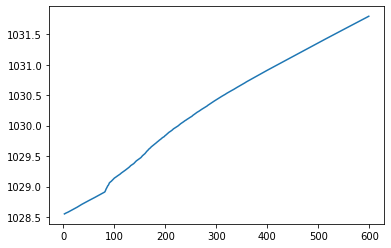

In [6]:
plt.plot(pressures, vec)


In [7]:
import numpy as np

0.0074632925121774765 1028.3590450992667


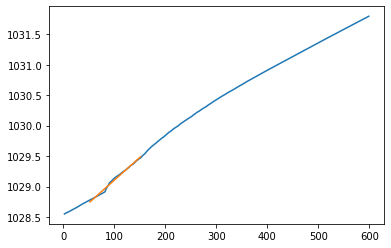

In [8]:
x = np.array(pressures)
y = np.array(vec)
m ,b = np.polyfit(x[50:150], y[50:150], 1)
print(m ,b)
plt.plot(x, y)
t = x[50:150]
plt.plot(t, m*t + b)

In [11]:
x = np.array(pressures)
y = np.array(vec)
window_size = 15
start_pos = window_size + 1
gradMax = 0
index_max = 0
PF1_max = PF2_max = (0,0)
for i in range(start_pos, len(x)-window_size):
    PF1 = np.polyfit(x[i-window_size+1:i], y[i-window_size+1:i], 1)
    PF2 = np.polyfit(x[i:i+window_size-1], y[i:i+window_size-1], 1)

    gradDiff = PF1[1] - PF2[1]
    # print(gradDiff)
    if gradDiff > gradMax:
        PF1_max = PF1
        PF2_max = PF2
        gradMax = gradDiff
        index_max = i

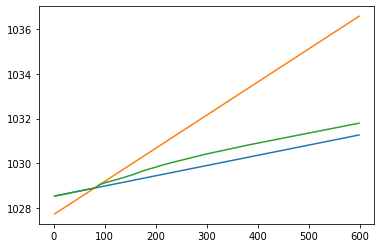

In [15]:
x = np.array(pressures)
y = np.array(vec)
# m ,b = np.polyfit(x[50:150], y[50:150], 1)
# print(m ,b)
# t = x[50:150]
# plt.plot(t, m*t + b)
plt.plot(x, PF1_max[0]*x + PF1_max[1])
plt.plot(x, PF2_max[0]*x + PF2_max[1])

plt.plot(x, y)
